## Step 0: Load Packages and Libraries


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import os
from scipy.sparse import coo_matrix
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Step 1: Data Loading and Preprocessing


In [3]:
# Read your dataset (replace 'marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv' with your dataset path)
train_data = pd.read_csv('Data/marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv', sep='\t')
train_data.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [4]:
train_data.head()

,Uniq Id,Crawl Timestamp,Dataset Origin,Product Id,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,NaN,076e5854a62dd283c253d6bae415af1f,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN,NaN,NaN,0353e63907dc0de0c734db4690300057
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,NaN,8a4fe5d9c7a6ed26cc44d785a454b124,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af
3,fddc4df45b35efd886794b261f730c51,2020-07-15 11:22:04 +0000,NaN,03b5fb878a33eadff8b033419eab9669,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/25b4b467-bc61...,NaN,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN,NaN,NaN,85b70fded09186f00467cea2f935b779
4,0990cf89a59ca6a0460349a3e4f51d42,2020-11-26T12:27:20+00:00,NaN,ce3d761e57d6ccad80619297b5b1bcbc,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,NaN,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,NaN,131.0,NaN,41c870871328e97da6fb036bb7d4b2da


In [7]:
train_data.shape

(5000, 32)

## Basic Operations


In [8]:
train_data.isnull().sum()

Uniq Id                               0
Crawl Timestamp                       0
Dataset Origin                     5000
Product Id                            0
Product Barcode                    5000
Product Company Type Source           0
Product Brand Source               4861
Product Brand Normalised Source    4861
Product Name Source                4861
Match Rank                         5000
Match Score                        5000
Match Type                         5000
Retailer                              0
Product Category                     10
Product Brand                        13
Product Name                          0
Product Price                        42
Sku                                5000
Upc                                5000
Product Url                           0
Market                                0
Product Description                1127
Product Currency                      0
Product Available Inventory           0
Product Image Url                     0


In [10]:
train_data = train_data[['Uniq Id','Product Id', 'Product Rating', 'Product Reviews Count', 'Product Category', 'Product Brand', 'Product Name', 'Product Image Url', 'Product Description', 'Product Tags']]
train_data.head(3)

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,NaN,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,NaN,NaN,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...


In [11]:
train_data.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Rating           2806
Product Reviews Count    1654
Product Category           10
Product Brand              13
Product Name                0
Product Image Url           0
Product Description      1127
Product Tags                0
dtype: int64

In [14]:
# Select relevant numeric columns (including those with missing values)
numeric_cols = ['Product Rating', 'Product Reviews Count']

In [15]:
# Normalize the numeric columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_data[numeric_cols])


In [16]:
# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")

In [17]:
# Perform KNN imputation on all selected columns
imputed_data = imputer.fit_transform(scaled_data)


In [18]:
# Replace the original columns with the imputed values
train_data[numeric_cols] = scaler.inverse_transform(imputed_data)


In [19]:
train_data.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Rating              0
Product Reviews Count       0
Product Category           10
Product Brand              13
Product Name                0
Product Image Url           0
Product Description      1127
Product Tags                0
dtype: int64

In [20]:
# Columns to fill with KNN
columns_to_fill = ['Product Category', 'Product Brand']

In [21]:
# Create a copy to avoid modifying the original data
data_copy = train_data.copy()

In [25]:
encoders = {}
for col in columns_to_fill:
    encoder = LabelEncoder()
    # Encode non-null values, leaving NaN as is
    data_copy[col] = data_copy[col].astype(str)  # Convert to string to handle NaN
    data_copy[col] = encoder.fit_transform(data_copy[col])
    encoders[col] = encoder  # Save the encoder for later decoding

In [26]:
# Apply KNN imputation
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputed_data = imputer.fit_transform(data_copy[columns_to_fill])

In [27]:
# Replace the imputed columns in the original data
for idx, col in enumerate(columns_to_fill):
    data_copy[col] = imputed_data[:, idx]

In [28]:
# Decode the categorical columns back to their original values
for col in columns_to_fill:
    data_copy[col] = data_copy[col].round(0).astype(int)  # Ensure integers for decoding
    data_copy[col] = encoders[col].inverse_transform(data_copy[col])


In [29]:
# Update the original data with filled values
train_data[columns_to_fill] = data_copy[columns_to_fill]

In [31]:
train_data.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Rating              0
Product Reviews Count       0
Product Category            0
Product Brand               0
Product Name                0
Product Image Url           0
Product Description      1127
Product Tags                0
dtype: int64

In [32]:
train_data.head(3)

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,4.294622,571.035565,936,1039,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,4.294622,571.035565,131,998,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.500000,29221.000000,137,299,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...


In [33]:
# Fill missing values in 'Product Description' with an empty string
train_data['Product Description'].fillna('', inplace=True)

/var/folders/vy/lbm6tmp563jbdts82tm6d2ym0000gn/T/ipykernel_29431/1913398147.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Product Description'].fillna('', inplace=True)


In [34]:
train_data.head(3)

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,4.294622,571.035565,936,1039,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,4.294622,571.035565,131,998,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.500000,29221.000000,137,299,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...


In [35]:
train_data.isnull().sum()


Uniq Id                  0
Product Id               0
Product Rating           0
Product Reviews Count    0
Product Category         0
Product Brand            0
Product Name             0
Product Image Url        0
Product Description      0
Product Tags             0
dtype: int64

In [37]:
train_data.duplicated().sum()

np.int64(0)

In [39]:
train_data.columns

Index(['Uniq Id', 'Product Id', 'Product Rating', 'Product Reviews Count',
       'Product Category', 'Product Brand', 'Product Name',
       'Product Image Url', 'Product Description', 'Product Tags'],
      dtype='object')

In [40]:
# make columns shorter
# Define the mapping of current column names to shorter names
column_name_mapping = {
    'Uniq Id': 'ID',
    'Product Id': 'ProdID',
    'Product Rating': 'Rating',
    'Product Reviews Count': 'ReviewCount',
    'Product Category': 'Category',
    'Product Brand': 'Brand',
    'Product Name': 'Name',
    'Product Image Url': 'ImageURL',
    'Product Description': 'Description',
    'Product Tags': 'Tags',
    'Product Contents': 'Contents'
}
# Rename the columns using the mapping
train_data.rename(columns=column_name_mapping, inplace=True)

In [41]:
train_data.head()

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,4.294622,571.035565,936,1039,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,4.294622,571.035565,131,998,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.500000,29221.000000,137,299,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,4.294622,571.035565,274,789,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,4.460000,131.000000,965,614,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


In [42]:
train_data['ID'] = train_data['ID'].str.extract(r'(\d+)').astype(float)
train_data['ProdID'] = train_data['ProdID'].str.extract(r'(\d+)').astype(float)

In [43]:
train_data.head()


,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,4.294622,571.035565,936,1039,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,9.500000e+01,76.0,4.294622,571.035565,131,998,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8.000000e+00,8.0,4.500000,29221.000000,137,299,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,4.000000e+00,3.0,4.294622,571.035565,274,789,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,9.900000e+02,3.0,4.460000,131.000000,965,614,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


In [44]:
# Format 'Rating' to one decimal point
train_data['Rating'] = train_data['Rating'].round(1)

# Round 'ReviewCount' to the nearest whole number and ensure it has a .0 at the end
train_data['ReviewCount'] = train_data['ReviewCount'].round(0)

# Ensure 'ReviewCount' is displayed as float with one decimal point
train_data['ReviewCount'] = train_data['ReviewCount'].astype(float)

# Display the formatted DataFrame
print(train_data[['Rating', 'ReviewCount']].head())


   Rating  ReviewCount
0     4.3        571.0
1     4.3        571.0
2     4.5      29221.0
3     4.3        571.0
4     4.5        131.0


In [45]:
train_data.head()


,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,4.3,571.0,936,1039,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,9.500000e+01,76.0,4.3,571.0,131,998,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8.000000e+00,8.0,4.5,29221.0,137,299,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,4.000000e+00,3.0,4.3,571.0,274,789,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,9.900000e+02,3.0,4.5,131.0,965,614,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


## Step 2: EDA (Exploratory Data Analysis)


In [46]:
# Basic statistics
num_users = train_data['ID'].nunique()
num_items = train_data['ProdID'].nunique()
num_ratings = train_data['Rating'].nunique()
print(f"Number of unique users: {num_users}")
print(f"Number of unique items: {num_items}")
print(f"Number of unique ratings: {num_ratings}")

Number of unique users: 1721
Number of unique items: 1697
Number of unique ratings: 35


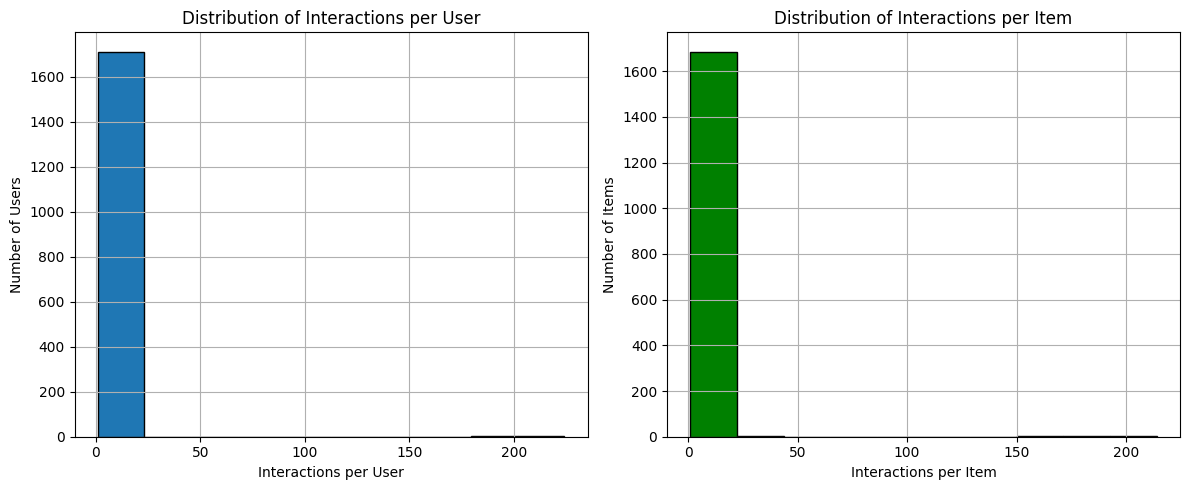

In [48]:
# Distribution of interactions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
train_data['ID'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

plt.subplot(1, 2, 2)
train_data['ProdID'].value_counts().hist(bins=10, edgecolor='k',color='green')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')

plt.tight_layout()
plt.show()

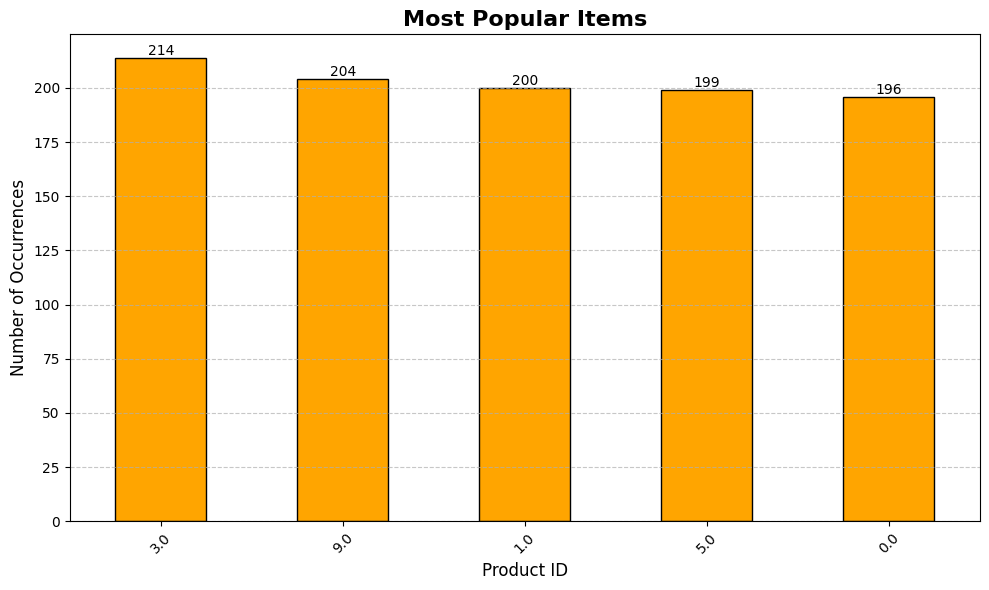

In [50]:
# Most popular items
popular_items = train_data['ProdID'].value_counts().head(5)

# Create a plot
plt.figure(figsize=(10, 6))  # Set figure size
ax = popular_items.plot(kind='bar', color='orange', edgecolor='black')

# Add a title and labels
plt.title("Most Popular Items", fontsize=16, fontweight='bold')
plt.xlabel("Product ID", fontsize=12)
plt.ylabel("Number of Occurrences", fontsize=12)

# Add data labels on top of the bars
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.0f}",  # Show exact count
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Improve x-axis readability if labels are long
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


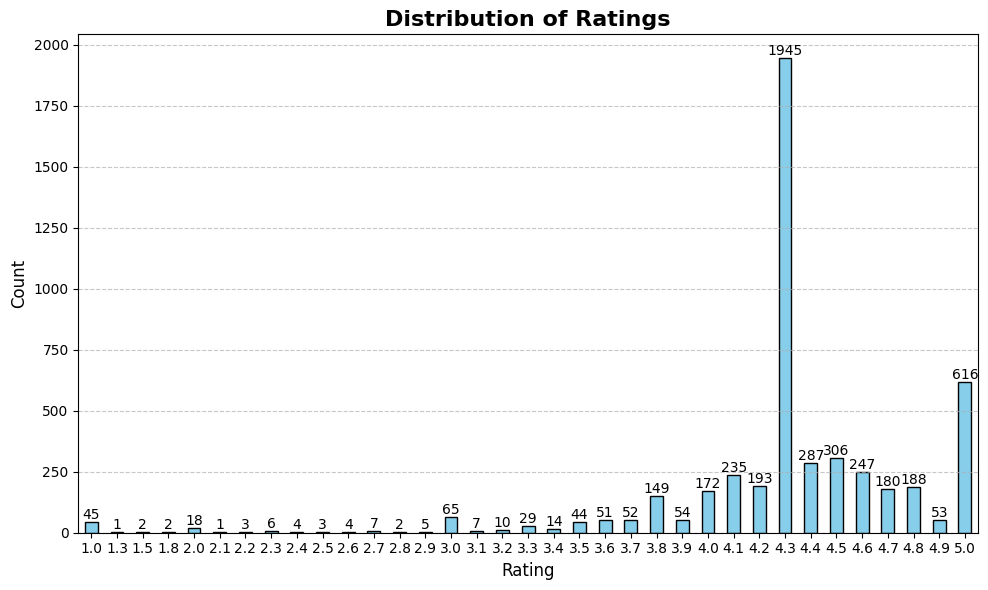

In [51]:
# Most rated counts
most_rated = train_data['Rating'].value_counts().sort_index()  # Sort by Rating

# Create the plot
plt.figure(figsize=(10, 6))  # Set figure size
ax = most_rated.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and axis labels
plt.title("Distribution of Ratings", fontsize=16, fontweight='bold')
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add data labels on top of each bar
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.0f}",  # Show exact count
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Improve x-axis readability
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


## Step 3: Data Cleaning and Tags Creations


In [53]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

def clean_and_extract_tags(text):
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)

columns_to_extract_tags_from = ['Category', 'Brand', 'Description']

for column in columns_to_extract_tags_from:
    train_data[column] = train_data[column].apply(clean_and_extract_tags)

In [54]:
# Concatenate the cleaned tags from all relevant columns
train_data['Tags'] = train_data[columns_to_extract_tags_from].apply(lambda row: ', '.join(row), axis=1)

In [55]:
train_data.head()

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,4.3,571.0,936,1039,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"936, 1039,"
1,9.500000e+01,76.0,4.3,571.0,131,998,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","131, 998, pack, 3, pack, 3, upc, 381519000201,..."
2,8.000000e+00,8.0,4.5,29221.0,137,299,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, give...","137, 299, clairol, nice, n, easy, permanent, c..."
3,4.000000e+00,3.0,4.3,571.0,274,789,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"calling, matte, lip, lovers, indulge, rich, cr...","274, 789, calling, matte, lip, lovers, indulge..."
4,9.900000e+02,3.0,4.5,131.0,965,614,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"1971, gillette, introduced, trac, ii, razor, s...","965, 614, 1971, gillette, introduced, trac, ii..."


## Rating Base Recommendations System

### When you come to a website for the first time they usually don't have any data about you to give recommendations. So websites generally show the top rated products



In [61]:
average_ratings = train_data.groupby(['Name','ReviewCount','Brand','ImageURL'])['Rating'].mean().reset_index()

In [65]:
top_rated_products = average_ratings.sort_values(by=['Rating'], ascending=False)


In [67]:
rating_base_recommendation = top_rated_products.head(10)

In [68]:
rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)


/var/folders/vy/lbm6tmp563jbdts82tm6d2ym0000gn/T/ipykernel_29431/1388308431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
/var/folders/vy/lbm6tmp563jbdts82tm6d2ym0000gn/T/ipykernel_29431/1388308431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)


In [69]:
rating_base_recommendation.head()

,Name,ReviewCount,Brand,ImageURL,Rating
2746,"Magic Stainless Steel Wipes, 30 Ct",2,875,https://i5.walmartimages.com/asr/c742b520-5deb...,5
4385,Summers Eve Delicate Blossom Feminine Wash For...,4,1355,https://i5.walmartimages.com/asr/c5f5880e-1ea4...,5
4398,"Sundown Naturals Tea Tree Oil Liquid, 1 Ounce",1,1363,https://i5.walmartimages.com/asr/4128a401-e3fc...,5
1999,Germa Aloe vera / Sabila 5000mg - 90 Softgels,1,610,https://i5.walmartimages.com/asr/a475459b-6cd1...,5
4394,Sun Essentials Sage (Large 4 Ounce) Best Essen...,1,1358,https://i5.walmartimages.com/asr/909b88ac-0499...,5


In [72]:
rating_base_recommendation.head()

,Name,ReviewCount,Brand,ImageURL,Rating
2746,"Magic Stainless Steel Wipes, 30 Ct",2,875,https://i5.walmartimages.com/asr/c742b520-5deb...,5
4385,Summers Eve Delicate Blossom Feminine Wash For...,4,1355,https://i5.walmartimages.com/asr/c5f5880e-1ea4...,5
4398,"Sundown Naturals Tea Tree Oil Liquid, 1 Ounce",1,1363,https://i5.walmartimages.com/asr/4128a401-e3fc...,5
1999,Germa Aloe vera / Sabila 5000mg - 90 Softgels,1,610,https://i5.walmartimages.com/asr/a475459b-6cd1...,5
4394,Sun Essentials Sage (Large 4 Ounce) Best Essen...,1,1358,https://i5.walmartimages.com/asr/909b88ac-0499...,5


## Content Base Recommendation system (User Preferences or Items similarities) - coming soon